# Explore and Summarize Data - Loan Data

## Introduction

> The purspose of this project is to explore and analyze a certain data set. The data set I have chosen for this project is Prosper Loan Data. This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, borrower employment status, borrower credit history, and the latest payment information. The full dataset can be seen [Here](https://github.com/TrikerDev/Explore-and-Summarize-Data---Loan-Data/blob/master/Explore%20and%20Summarize%20Data%20-%20Loan%20Data/prosperLoanData.csv) and the definitions the variables can be seen [Here](https://github.com/TrikerDev/Explore-and-Summarize-Data---Loan-Data/blob/master/Explore%20and%20Summarize%20Data%20-%20Loan%20Data/Prosper%20Loan%20Data%20-%20Variable%20Definitions%20-%20Sheet1.pdf). This full project and all files and work can be seen on [This Github Repository](https://github.com/TrikerDev/Explore-and-Summarize-Data---Loan-Data). This project was carried out through Jupyter Notebooks using [IRkernal, which allows for the use of R in Jupyter](https://irkernel.github.io/installation/#binary-panel).

## Loading Data

In [202]:
# Installing packages to be used
install.packages("ggplot2", dependencies = T) 
install.packages("knitr", dependencies = T)
install.packages("dplyr", dependencies = T)
# They have already been installed before, hence the warning message. It is only necessary for the first time running

Warning message:
"package 'ggplot2' is in use and will not be installed"
Warning message:
"package 'knitr' is in use and will not be installed"
Warning message:
"package 'dplyr' is in use and will not be installed"


In [197]:
# Importing packages to be used
library(ggplot2)
library(knitr)
library(dplyr)

In [193]:
# Loading in dataset, setting to variable 'data'
data <- read.csv('prosperLoanData.csv')

In [116]:
# Summary of dataset
summary(data)

  ListingKey        ListingNumber     ListingCreationDate CreditGrade       
 Length:113937      Min.   :      4   Length:113937       Length:113937     
 Class :character   1st Qu.: 400919   Class :character    Class :character  
 Mode  :character   Median : 600554   Mode  :character    Mode  :character  
                    Mean   : 627886                                         
                    3rd Qu.: 892634                                         
                    Max.   :1255725                                         
                                                                            
      Term        LoanStatus         ClosedDate         BorrowerAPR     
 Min.   :12.00   Length:113937      Length:113937      Min.   :0.00653  
 1st Qu.:36.00   Class :character   Class :character   1st Qu.:0.15629  
 Median :36.00   Mode  :character   Mode  :character   Median :0.20976  
 Mean   :40.83                                         Mean   :0.21883  
 3rd Qu.:36.00     

In [117]:
# variables in dataset
names(data)

[1] "ListingKey"                          "ListingNumber"                      
 [3] "ListingCreationDate"                 "CreditGrade"                        
 [5] "Term"                                "LoanStatus"                         
 [7] "ClosedDate"                          "BorrowerAPR"                        
 [9] "BorrowerRate"                        "LenderYield"                        
[11] "EstimatedEffectiveYield"             "EstimatedLoss"                      
[13] "EstimatedReturn"                     "ProsperRating..numeric."            
[15] "ProsperRating..Alpha."               "ProsperScore"                       
[17] "ListingCategory..numeric."           "BorrowerState"                      
[19] "Occupation"                          "EmploymentStatus"                   
[21] "EmploymentStatusDuration"            "IsBorrowerHomeowner"                
[23] "CurrentlyInGroup"                    "GroupKey"                           
[25] "DateCreditPulled"                    "CreditScoreRangeLower"              
[27] "CreditScoreRangeUpper"               "FirstRecordedCreditLine"            
[29] "CurrentCreditLines"                  "OpenCreditLines"                    
[31] "TotalCreditLinespast7years"          "OpenRevolvingAccounts"              
[33] "OpenRevolvingMonthlyPayment"         "InquiriesLast6Months"               
[35] "TotalInquiries"                      "CurrentDelinquencies"               
[37] "AmountDelinquent"                    "DelinquenciesLast7Years"            
[39] "PublicRecordsLast10Years"            "PublicRecordsLast12Months"          
[41] "RevolvingCreditBalance"              "BankcardUtilization"                
[43] "AvailableBankcardCredit"             "TotalTrades"                        
[45] "TradesNeverDelinquent..percentage."  "TradesOpenedLast6Months"            
[47] "DebtToIncomeRatio"                   "IncomeRange"                        
[49] "IncomeVerifiable"                    "StatedMonthlyIncome"                
[51] "LoanKey"                             "TotalProsperLoans"                  
[53] "TotalProsperPaymentsBilled"          "OnTimeProsperPayments"              
[55] "ProsperPaymentsLessThanOneMonthLate" "ProsperPaymentsOneMonthPlusLate"    
[57] "ProsperPrincipalBorrowed"            "ProsperPrincipalOutstanding"        
[59] "ScorexChangeAtTimeOfListing"         "LoanCurrentDaysDelinquent"          
[61] "LoanFirstDefaultedCycleNumber"       "LoanMonthsSinceOrigination"         
[63] "LoanNumber"                          "LoanOriginalAmount"                 
[65] "LoanOriginationDate"                 "LoanOriginationQuarter"             
[67] "MemberKey"                           "MonthlyLoanPayment"                 
[69] "LP_CustomerPayments"                 "LP_CustomerPrincipalPayments"       
[71] "LP_InterestandFees"                  "LP_ServiceFees"                     
[73] "LP_CollectionFees"                   "LP_GrossPrincipalLoss"              
[75] "LP_NetPrincipalLoss"                 "LP_NonPrincipalRecoverypayments"    
[77] "PercentFunded"                       "Recommendations"                    
[79] "InvestmentFromFriendsCount"          "InvestmentFromFriendsAmount"        
[81] "Investors"

> There are a lot of variables here and we are going to narrow these down to 12 variables to perform an analysis on. These variables will be:
> * Term
> * BorrowerAPR
> * BankcardUtilization
> * IncomeRange
> * LoanOriginalAmount
> * InquiriesLast6Months
> * EmploymentStatus
> * OnTimeProsperPayments
> * TotalProsperLoans
> * CreditScoreRangeLower
> * CreditScoreRangeUpper
> * LoanStatus

> I feel that these variables will provide good insight on loans off of eachother, for example, how does employment status affect the inquiries in the past 6 months? How does credit score affect the loan amount? These variables should provide good insight into different types of loans and how they affect other variables.

In [204]:
# Getting the variables we want to keep
vars <- c('Term','BorrowerAPR','BankcardUtilization','IncomeRange','LoanOriginalAmount','InquiriesLast6Months','EmploymentStatus','OnTimeProsperPayments','TotalProsperLoans','CreditScoreRangeLower','CreditScoreRangeUpper','LoanStatus')

# Assigning the variables we want to a seperate dataset
newData <- data[vars]

# Showing the names of the new dataset to make sure we got the correct variables
names(newData)

[1] "Term"                  "BorrowerAPR"           "BankcardUtilization"  
 [4] "IncomeRange"           "LoanOriginalAmount"    "InquiriesLast6Months" 
 [7] "EmploymentStatus"      "OnTimeProsperPayments" "TotalProsperLoans"    
[10] "CreditScoreRangeLower" "CreditScoreRangeUpper" "LoanStatus"

## Univariate Analysis

### Term

> The length of the loan expressed in months.

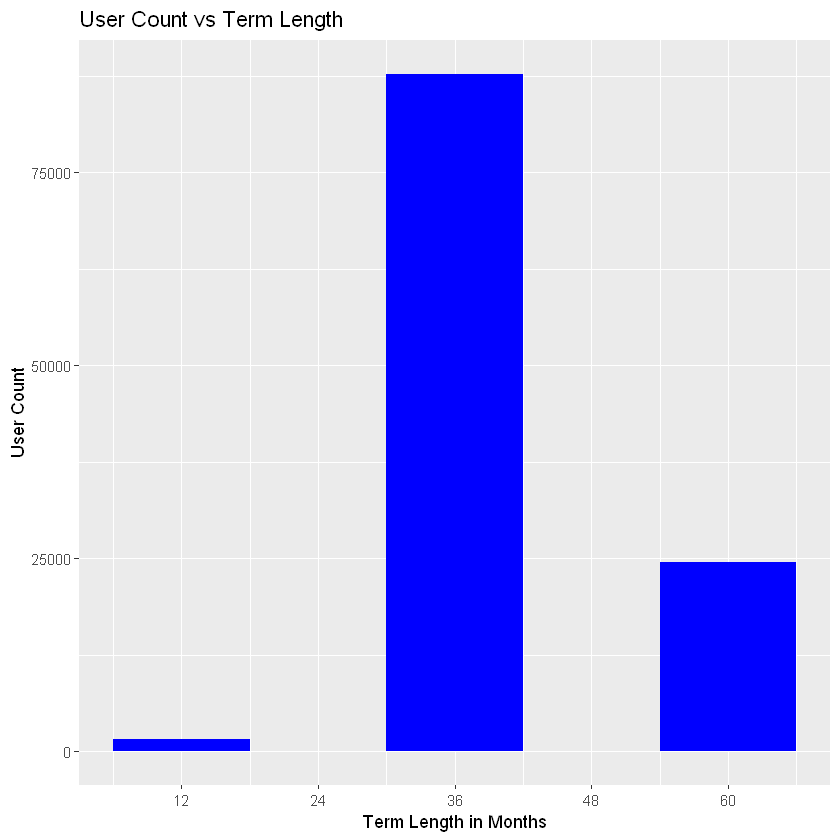

In [264]:
termData <- newData['Term']

termChart <- ggplot(aes(x = Term), data = termData) +
                geom_histogram(binwidth = 12, fill = 'blue') +
                scale_x_continuous(breaks = seq(0, 60, 12))

termChart + ggtitle('User Count vs Term Length') +
            xlab('Term Length in Months') +
            ylab('User Count')

In [271]:
print(termData)

      Term
1       36
2       36
3       36
4       36
5       36
6       60
7       36
8       36
9       36
10      36
11      60
12      36
13      36
14      36
15      60
16      36
17      60
18      36
19      36
20      60
21      36
22      36
23      36
24      36
25      36
26      36
27      60
28      36
29      36
30      36
31      36
32      36
33      36
34      36
35      36
36      36
37      36
38      36
39      36
40      36
41      60
42      60
43      36
44      36
45      36
46      60
47      36
48      36
49      60
50      60
51      60
52      36
53      36
54      36
55      60
56      36
57      36
58      36
59      60
60      36
61      60
62      36
63      36
64      36
65      36
66      36
67      36
68      12
69      36
70      60
71      36
72      36
73      36
74      36
75      36
76      36
77      36
78      36
79      36
80      36
81      36
82      60
83      36
84      36
85      60
86      60
87      36
88      36
89      36
90      36

> We can see from this chart that the terms offered by Prosper are either 12 months, 36 months, or 60 months. 1, 3, or 5 years. Nothing inbetween. From the user count, the most popular term length is 3 years, followed by significantly less users at 5 year terms. The 1 year term is very unpopular by a user count perspective.

### Borrower APR

> The Borrower's Annual Percentage Rate (APR) for the loan. 

Warning message:
"Removed 25 rows containing non-finite values (stat_bin)."


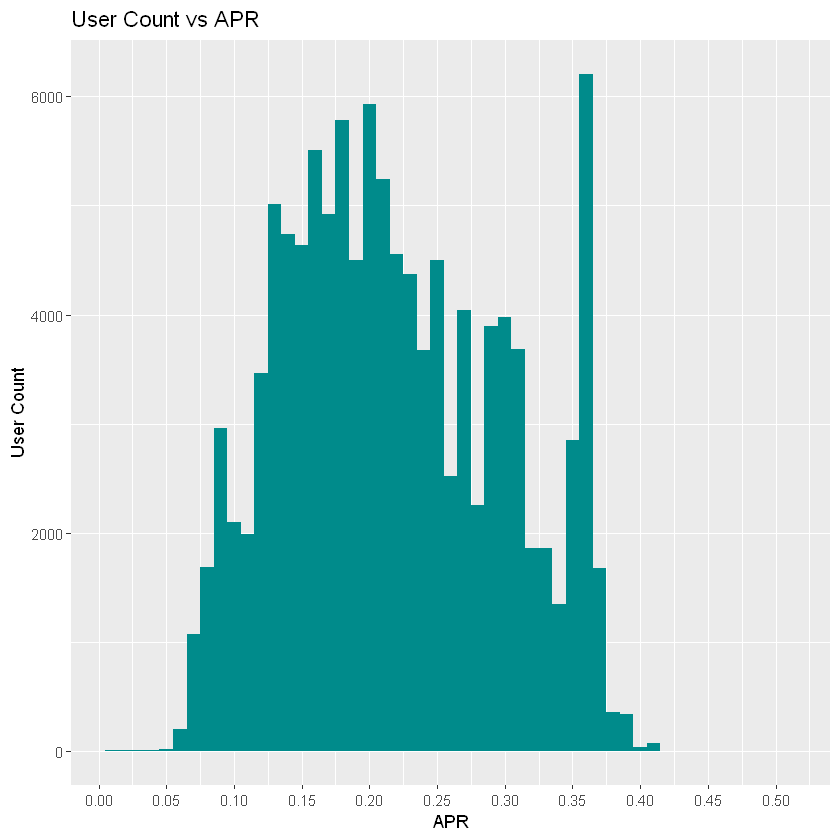

In [265]:
aprData <- newData['BorrowerAPR']

aprChart <- ggplot(aes(x = BorrowerAPR), data = aprData) +
                geom_histogram(binwidth = 0.01, fill = 'cyan4') +
                scale_x_continuous(breaks = seq(0, 0.5, 0.05))

aprChart + ggtitle('User Count vs APR') +
            xlab('APR') +
            ylab('User Count')

> APR is really spread out all over the place. There really isnt one APR that is significantly more common than the others. The count with the highest is around ~0.38 but there is a very even grouping of users with APR all over the chart.

### Bankcard Utilization

> The percentage of available revolving credit that is utilized at the time the credit profile was pulled.

Warning message:
"Removed 25854 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 2 rows containing missing values (geom_bar)."


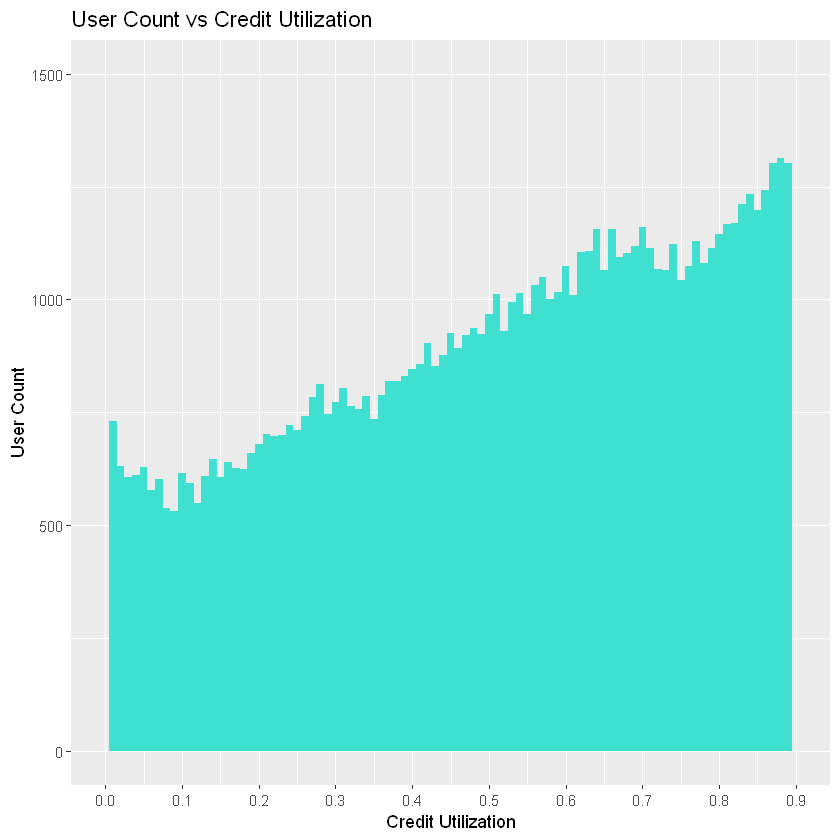

In [280]:
bankData <- newData['BankcardUtilization']

bankChart <- ggplot(aes(x = BankcardUtilization), data = bankData) +
                geom_histogram(binwidth = 0.01, fill = 'turquoise') +
                scale_x_continuous(limits = c(0,0.9), breaks = seq(0, 0.9, 0.1)) +
                scale_y_continuous(limits = c(0,1500))

bankChart + ggtitle('User Count vs Credit Utilization') +
            xlab('Credit Utilization') +
            ylab('User Count')

> More users have a higher credit utilization. Fewer users have a lower credit utilization. We could infer from this that as credit utilization increases, more people will look into getting a loan, probably trying to pay down on their credit cards. As credit utilization increases, the chance a person seek a loan is higher.

### Income Range

> The income range of the borrower at the time the listing was created.

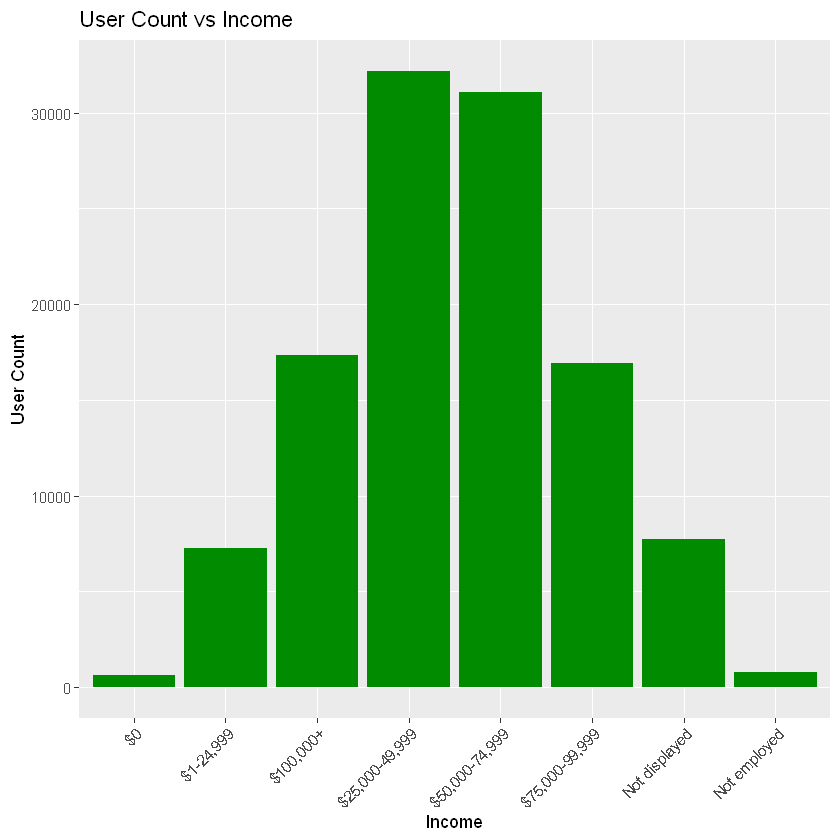

In [299]:
incomeData <- newData['IncomeRange']

incomeChart <- ggplot(aes(x = IncomeRange), data = incomeData) +
                geom_bar(fill = 'green4') +
                theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))

incomeChart + ggtitle('User Count vs Income') +
            xlab('Income') +
            ylab('User Count')

> Most users have an income of 25,000 - 45,000, with somewhat fewer having an income between 50,000 - 74,999.

### Original Loan Amount

> The origination amount of the loan.

### Inquiries Last 6 Months

> Number of inquiries in the past six months at the time the credit profile was pulled.

### Employment Status

> The employment status of the borrower at the time they posted the listing.

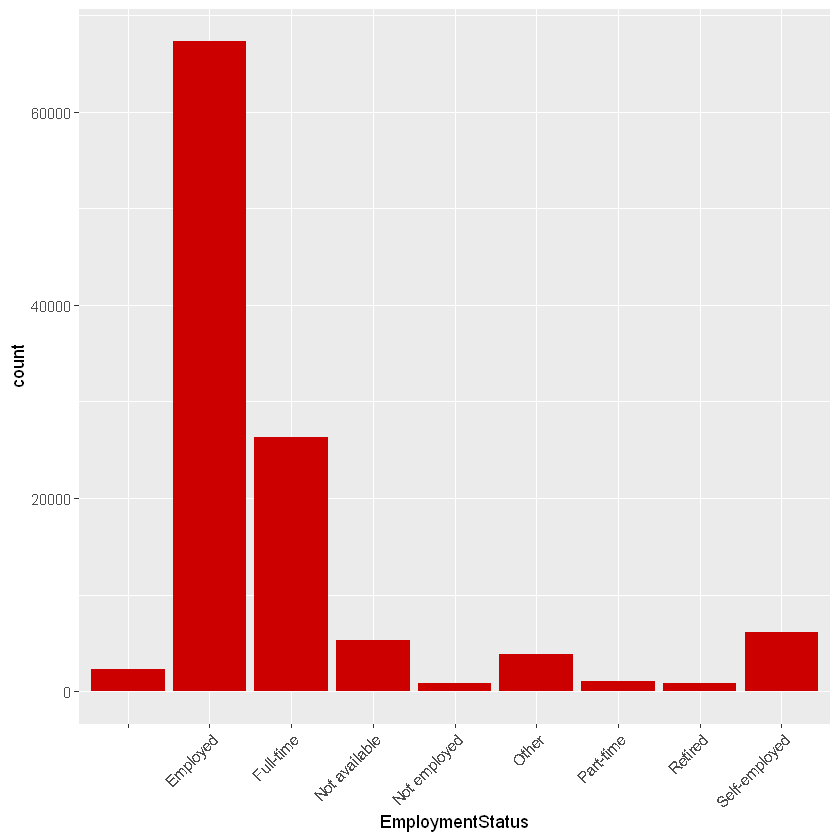

In [314]:
employmentData <- newData['EmploymentStatus']

employmentChart <- ggplot(aes(x = EmploymentStatus), data = employmentData) +
                geom_bar(fill = "red3") +
                theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))

employmentChart

> The vast majority of users are employed in some fashion, mostly full-time.

### On Time Prosper Payments

> Number of on time payments the borrower had made on Prosper loans at the time they created this listing. This value will be null if the borrower has no prior loans.

### Total Prosper Loans

> Number of Prosper loans the borrower at the time they created this listing. This value will be null if the borrower had no prior loans. 

### Credit Score Range Lower

> The lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency.

### Credit Score Range Upper

> The upper value representing the range of the borrower's credit score as provided by a consumer credit rating agency.

### Loan Status

> The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.